<a href="https://colab.research.google.com/github/dincker/PLN/blob/master/Analisis%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ds1.zip to ds1.zip


In [0]:
import io
import json
from zipfile import ZipFile
lista = []

with ZipFile(io.BytesIO(uploaded['ds1.zip']), 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
     # Check filename endswith csv
     #print(fileName)
     if fileName.endswith('.json'):
       with zipObj.open(fileName) as file_text:
         #zipObj.extract(fileName, 'temp_csv')
         d = file_text.read()
         d = json.loads(d)
         #print(d['text'])
         lista.append(d['text'])  
         # Extract a single file from zip

In [0]:
df = pd.DataFrame(lista,columns=['News'])

In [5]:
df.head()

,News
0,Garantía 12 meses (1 año) Comentarios del anun...
1,Cinco militares mexicanos murieron y 10 result...
2,EL NACIONAL WEB 1 de octubre 2016 - 03:58 pm L...
3,ACTUALIZA 3-Clinton busca mantener a Trump a l...
4,La pregunta no puede contener URLs Tu nombre T...


Tokenizacion (lemma + tokenize + non_words - spacy, stemmer nltk)

In [6]:
#Cargando modelo en español de spacy
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
from nltk import SnowballStemmer
def normalize(text):
  #Tokenice spacy
  doc = nlp(text)
  #Lemmatizacion spacy, normalice
  words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
  #Normalice
  lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
  #Stemmer
  spanishstemmer = SnowballStemmer('spanish')
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return lexical_tokens


Tokenizacion (lemma + tokenize - nltk , non_words - string, stemmer nltk)

---



In [8]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from string import punctuation
from nltk import word_tokenize
stemmer = SnowballStemmer('spanish')
#normalice
non_words = list(punctuation)
non_words.extend(['¿','¡'])
non_words.extend(map(str,range(10)))
def stem_tokens(tokens, stemmer):
    stemmed = []
    #Stemmer
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
  #Tokenice and normalice
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


In [10]:
print(tokenize(df['News'][0]))
print(normalize(df['News'][0]))

['garant', 'mes', 'año', 'comentari', 'del', 'anunci', 'vehicul', 'en', 'buen', 'estad', 'manten', 'al', 'dia', 'libr', 'de', 'revision', 'motor', 'di', 'cv', 'plaz', 'lun', 'tint', 'bol', 'de', 'remolqu', 'estrib', 'lateral', 'defens', 'delanter', 'tod', 'homolog', 'kilometr', 'demostr', 'garanti', 'un', 'año', 'se', 'acept', 'vehicul', 'com', 'part', 'de', 'pag', 'iruri', 'motor', 'desd', 'especial', 'en', 'x', 'gran', 'varied', 'de', 'vehicul', 'compr', 'su', 'x', 'equip', 'extra']
['garantía', 'mesar', 'comentarios', 'anunciante', 'vehiculo', 'mantenimiento', 'librar', 'revisión', 'motor', 'plaza', 'luna', 'tintar', 'bola', 'remolcar', 'estribo', 'lateral', 'defensa', 'delantero', 'homologar', 'kilometros', 'demostrables', 'garantia', 'acepto', 'vehículo', 'pagar', 'iruri', 'motor', 'especialistas', 'variedad', 'vehiculos', 'compramos', 'equipamiento', 'extra']


Stop Words

In [11]:
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
len(spanish_stopwords)

313

In [12]:
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32917 sha256=4735d211e4a8c69e3f0f85d60ab38011467d74c42cc4ba281629c3b0e9a30c20
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [13]:
from stop_words import get_stop_words
stop_words_sw = get_stop_words('spanish')
len(stop_words_sw)

308

In [14]:
from spacy.lang.es.stop_words import STOP_WORDS
len(STOP_WORDS)

551

Vextorizer

sklearn

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = normalize,
                lowercase = True,
                #stop_words = spanish_stopwords) #NLTK
                #stop_words = stop_words_sw) #stop-words
                stop_words = STOP_WORDS) #Spacy


In [0]:
res = vectorizer.fit_transform(df['News'])

In [17]:
count_train = vectorizer.fit(df['News'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
bag_of_wors = count_train.transform(df['News'])

In [19]:
print(res.getcol(0))

  (55, 0)	1


In [20]:
print(bag_of_wors.getcol(0))

  (55, 0)	1


In [21]:
bag_of_wors.shape

(1000, 18824)

In [0]:
top_10 = list(count_train.vocabulary_.keys())

In [29]:
!pip install scipy

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 palabras mas comunes')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

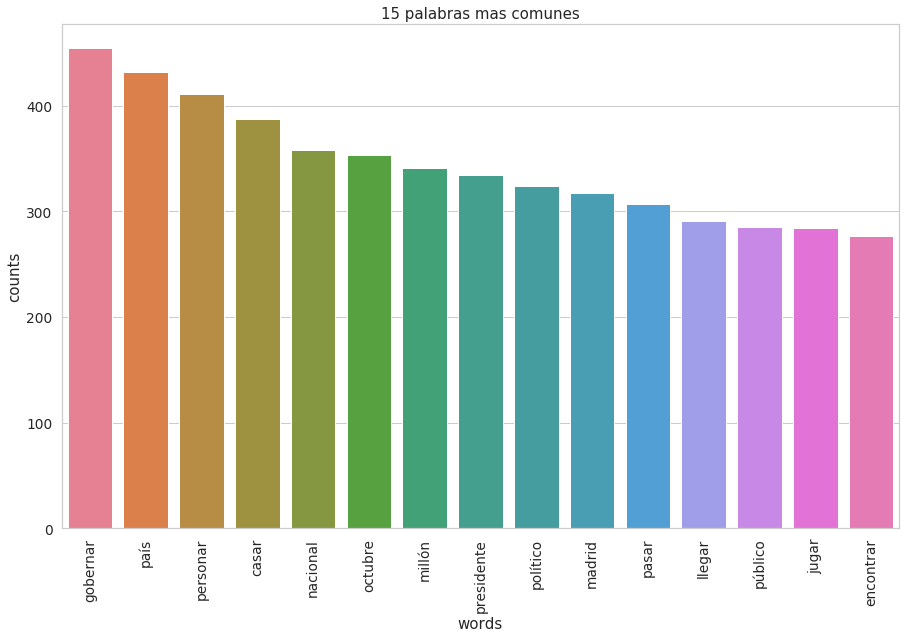

In [39]:
plot_15_most_common_words(bag_of_wors, vectorizer)

In [48]:
x

<1000x18824 sparse matrix of type '<class 'numpy.float64'>'
	with 103404 stored elements in Compressed Sparse Row format>

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(bag_of_wors)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
tfidf=tfidf_transformer.transform(bag_of_wors)

In [41]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
octubre,2.483805
personar,2.492654
casar,2.492654
país,2.533476
pasar,2.556897
...,...
guga,7.215608
guiamets,7.215608
guido,7.215608
guazapa,7.215608


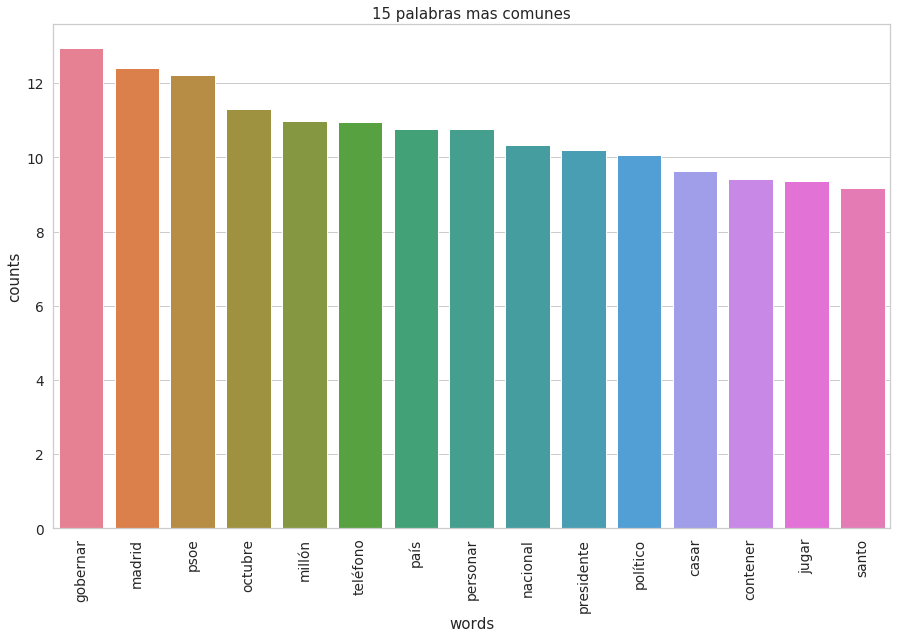

In [50]:
#palabras mas representativas
plot_15_most_common_words(tfidf, vectorizer)

In [0]:
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(res)

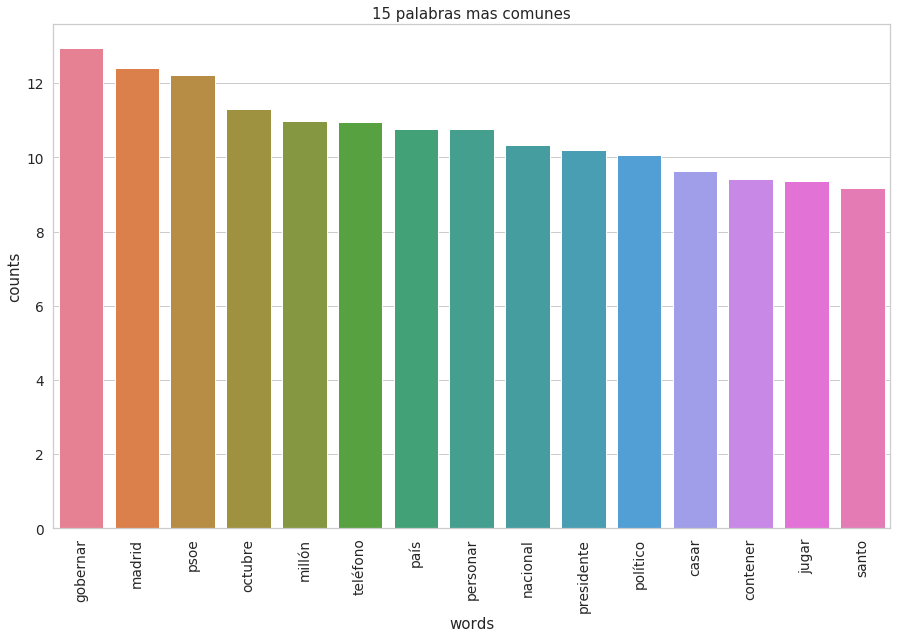

In [52]:
#palabras mas representativas
plot_15_most_common_words(tf_idf_vector, vectorizer)

In [28]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[1]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
militar,0.342412
sinaloa,0.270289
guzmán,0.270289
chapar,0.236825
emboscar,0.219061
...,...
energetica,0.000000
enemigo,0.000000
endurecer,0.000000
ends,0.000000


In [29]:
tf_idf_vector

<1000x18824 sparse matrix of type '<class 'numpy.float64'>'
	with 103404 stored elements in Compressed Sparse Row format>

GridSearch

In [0]:
#DEFINIENDO LOS PARAMETROS DE BUSQUEDA
search_params = {'n_components':[4,5,6],'learning_decay':[.5,.7,.9],'n_jobs':[-1]}

In [0]:
#INICIANDO EL MODELO
from sklearn.decomposition import LatentDirichletAllocation
ldaa= LatentDirichletAllocation()

In [0]:
from sklearn.model_selection import GridSearchCV
#INICIANDO LA CLASE GRID SEARCH
model = GridSearchCV(ldaa,param_grid=search_params)

In [76]:
#HACER UNA BUSQUEDA DE CUADRIC
model.fit(res)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
#Mejor modelo
best_lda_model=model.best_estimator_

In [78]:
#Paramtros modelo
print("Best Model's Params: ",model.best_params_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 4, 'n_jobs': -1}


In [79]:
#REgistro ed puntaje de probabilidad
print("Mejor puntaje de probabilidad: ",model.best_score_)

Mejor puntaje de probabilidad:  -318991.63366336847


In [80]:
#Perplejidad
print("Modelo prerplejidad: ", best_lda_model.perplexity(res))

Modelo prerplejidad:  6278.420110947171


In [81]:
best_lda_model.components_

array([[0.25000267, 0.2500009 , 0.25072454, ..., 0.25000028, 1.24992929,
        0.25000126],
       [0.2500053 , 0.25155649, 0.25000144, ..., 0.25000043, 0.25002982,
        0.25000186],
       [1.24998696, 0.25000096, 0.250001  , ..., 0.25000028, 0.25001693,
        0.25000123],
       [0.25000507, 2.24844166, 1.24927301, ..., 1.24999901, 0.25002396,
        1.24999565]])

In [82]:
#for gscore in model.cv_results_:
#    print(gscore)
lista=[]
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
for gscore,params in zip(gscore,params): 
    if params==0.5:
        lista.append(gscore)
        
print(lista)

[-318991.63366336847, -328997.9777537806, -338110.56149558915]


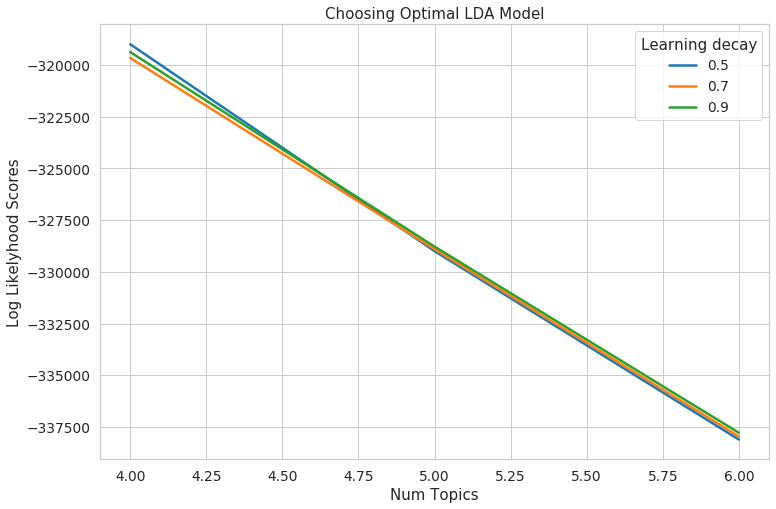

In [83]:
import matplotlib.pyplot as plt
# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
n_topics=[4,5,6]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
Log_likelyoods_5=[]
Log_likelyoods_7=[]
Log_likelyoods_9=[]
for gscore,params in zip(gscore,params):
    if params==0.5:
        Log_likelyoods_5.append(round(gscore))
    if params==0.7:
        Log_likelyoods_7.append(round(gscore))
    if params==0.9:
        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, Log_likelyoods_5, label='0.5')
plt.plot(n_topics, Log_likelyoods_7, label='0.7')
plt.plot(n_topics, Log_likelyoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()


Tema dominante en el texto

In [0]:
#Crear documentos- Matriz de temas
lda_output = best_lda_model.transform(res)

In [85]:
best_lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.5,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [0]:
#Nombre de columnas
topicnames = []
for i in range(int(best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [0]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(1000):
    docnames.append('Doc'+str(i))

In [0]:
import numpy as np
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(lda_output,2),columns=topicnames,index=docnames)

In [0]:
# Obtener tema dominante para cada documento
dominant_topic=np.argmax(df_document_topic.values,axis=1)
df_document_topic['dominant_topic']=dominant_topic

In [0]:
#Estilando
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [91]:
#Aplicando estilo
df_document_topic=df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topic

,Topic0,Topic1,Topic2,Topic3,dominant_topic
Doc0,0.04,0.94,0.01,0.01,1
Doc1,0,0.97,0.03,0,1
Doc2,0,0,0,1,3
Doc3,0.87,0,0,0.12,0
Doc4,0.01,0.01,0.96,0.01,2
Doc5,0,0,0,0.99,3
Doc6,0,1,0,0,1
Doc7,0,0,0.68,0.32,2
Doc8,0,0,1,0,2
Doc9,0.99,0,0,0,0


Distribucion de temas en el texto

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

In [0]:
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

In [94]:
# View
df_topic_keywords.head()

,aaalllooohhhaaa,aacca,aalto,aaron,aarón,abadía,abajar,abalanzar,abanderar,abandonar,abandonarlas,abanicar,abar,abarcar,abarcarlo,abarrote,abastar,abastecimiento,abatible,abatir,abccordoba,abdala,abdel,abderrahman,abdo,abdomen,abdominal,abdominoplastia,abeba,abecia,abel,abelardo,aberrante,abertas,abertis,abet,abiertamente,abigail,abismal,abismar,...,úsala,útil,útlima,ýspanya,ăąrea,ăşltimas,ăşltimo,ăşnico,škoda,ťalgunos,ťbobby,ťborn,ťcafé,ťcuarto,ťhola,ťlos,ťmemeces,ťnew,ťostias,ťsería,ťsnowdenť,ťthe,ťtodas,ťvuelvo,ťórbita,żcon,żconsideras,żconsultas,żcómo,żeres,żles,żlos,żpor,żqué,żresulta,żson,żtus,żťla,ſeptiembre,йstos
Topic0,0.250003,0.250001,0.250725,0.250008,2.301118,3.237626,4.837408,0.260170,0.250001,7.460601,0.250003,1.249578,0.250003,3.026897,0.252983,0.250001,1.249983,1.250343,0.306521,3.211658,0.256403,0.266316,0.250002,0.261874,0.266316,0.250006,0.250002,0.250005,4.246984,0.250001,0.250005,0.253919,0.273007,0.250002,3.249991,0.252038,1.249729,0.250491,1.250004,0.250002,...,0.250001,8.778957,0.250001,1.249961,0.250002,0.250003,0.250002,0.250002,0.250001,1.249989,0.250000,0.250000,0.250000,3.249990,0.250000,0.250000,1.249989,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,3.249990,0.250000,0.250000,0.250000,0.252150,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,1.249929,0.250001
Topic1,0.250005,0.251556,0.250001,1.676052,1.198875,0.262370,3.720293,1.237760,0.250002,13.550326,0.250005,1.250407,2.070172,1.250028,0.250002,1.249997,0.250007,0.250013,2.438029,1.250051,2.217826,0.250010,1.238948,2.238119,0.250010,1.250296,1.502944,0.365788,0.253007,0.251143,0.250007,0.250004,0.250003,1.249993,0.250003,0.250004,0.250006,1.249507,0.250006,0.251736,...,1.249996,3.466436,1.249998,0.250013,0.250003,0.250004,0.250003,0.250003,0.250001,0.250004,0.250000,0.250000,0.250000,0.250004,0.250000,0.250000,0.250004,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250004,0.250000,0.250000,0.250000,0.250001,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250030,0.250002
Topic2,1.249987,0.250001,0.250001,0.823928,0.250003,0.250002,0.253605,0.252066,1.249996,25.723752,1.249988,0.250006,0.250313,1.348789,0.256627,0.250001,0.250005,1.010382,2.005428,0.284188,0.250006,0.255383,0.261048,0.250003,0.255383,2.249689,6.997052,1.134200,0.250004,0.250001,0.409328,1.246073,0.253961,0.250002,0.250002,0.273126,1.250164,0.250001,0.298049,2.249972,...,0.250001,1.849964,0.250001,0.250009,0.250002,0.250003,0.250002,0.250002,0.250001,0.250003,0.250000,0.250000,0.250000,0.250003,0.250000,0.250000,0.250003,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250003,0.250000,0.250000,0.250000,0.250001,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250017,0.250001
Topic3,0.250005,2.248442,1.249273,0.250012,0.250004,0.250002,5.188695,0.250004,0.250001,9.265321,0.250004,0.250008,1.429512,2.374287,1.240388,0.250001,0.250006,0.489263,0.250022,0.254103,0.275765,1.228292,0.250002,0.250004,1.228292,0.250009,0.250003,0.250007,0.250005,1.248855,2.090661,0.250004,1.223029,0.250003,0.250003,1.224832,1.250102,0.250001,1.201941,1.248289,...,0.250001,0.904643,0.250001,0.250016,1.249994,1.249990,1.249992,1.249992,1.249998,0.250004,1.249999,1.249999,1.249999,0.250003,1.249999,1.249999,0.250004,1.249999,2.249999,1.249999,1.249999,1.249999,1.249999,1.249999,0.250003,1.249999,1.249999,1.249999,2.247848,1.249999,1.249999,1.249999,1.249999,7.249999,1.249999,1.249999,1.249999,1.249999,0.250024,1.249996


In [95]:
# Show top n keywords for each topic
def show_topics(cv=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(cv.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(cv=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,país,gobernar,millón,personar,contener,casar,publicar,unir,político,octubre,pagar,derecho,nacional,usuario,público
Topic 1,foto,personar,nacional,salir,casar,pasar,llegar,encontrar,presentar,mundo,ciudad,vehículo,hijo,publicar,mesar
Topic 2,psoe,gobernar,presidente,sánchez,madrid,político,santo,personar,comité,septiembre,país,socialista,federal,españa,nacional
Topic 3,jugar,equipar,jugador,ganar,punto,ligar,llegar,octubre,pasar,temporada,victoria,volver,barcelona,argentino,minuto


Captar las palabras de mayor probabilidad por tema

In [96]:
for index,topic in enumerate(best_lda_model.components_):
    print(f'Las principales 15 palabras del tema #(index)')
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

Las principales 15 palabras del tema #(index)
['público', 'usuario', 'nacional', 'derecho', 'pagar', 'octubre', 'político', 'unir', 'publicar', 'casar', 'contener', 'personar', 'millón', 'gobernar', 'país']




Las principales 15 palabras del tema #(index)
['mesar', 'publicar', 'hijo', 'vehículo', 'ciudad', 'mundo', 'presentar', 'encontrar', 'llegar', 'pasar', 'casar', 'salir', 'nacional', 'personar', 'foto']




Las principales 15 palabras del tema #(index)
['nacional', 'españa', 'federal', 'socialista', 'país', 'septiembre', 'comité', 'personar', 'santo', 'político', 'madrid', 'sánchez', 'presidente', 'gobernar', 'psoe']




Las principales 15 palabras del tema #(index)
['minuto', 'argentino', 'barcelona', 'volver', 'victoria', 'temporada', 'pasar', 'octubre', 'llegar', 'ligar', 'punto', 'ganar', 'jugador', 'equipar', 'jugar']






SOM

In [97]:
!pip install sompy

  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3085 sha256=6fa0842a352f198c1590ed092c3b3d0826f5f649b64e2f7e9158a55c50173db9
  Stored in directory: /root/.cache/pip/wheels/1f/42/7d/e9840b06153bd7e5cefa2ea2e4987f49c3fe37c1801948ea42
Successfully built sompy


In [98]:
!pip install git+https://github.com/sevamoo/SOMPY

  Cloning https://github.com/sevamoo/SOMPY to /tmp/pip-req-build-xa8og2y3
  Running command git clone -q https://github.com/sevamoo/SOMPY /tmp/pip-req-build-xa8og2y3
  Created wheel for SOMPY: filename=SOMPY-1.1-cp36-none-any.whl size=28117 sha256=d9d5de4307f17848a647a01adc0dfc2097f59fd3815979cb7833ec456a1609d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-2bdtf1a4/wheels/89/eb/f9/61aa37e7c35ddc5fdaeb57dae54241a1a80bdd472cce3024fa
Successfully built SOMPY
  Found existing installation: sompy 0.1.1
    Uninstalling sompy-0.1.1:
      Successfully uninstalled sompy-0.1.1


In [0]:
from sompy import SOMFactory

In [100]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [0]:
name=['Tech','Economy','Sport','Entertainment']

In [0]:
#msz = calculate_msz(data)
sm = SOMFactory().build(lda_output, normalization = 'var', initialization='random', component_names=name)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [104]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.368; Quantization error = 0.08527506876177916


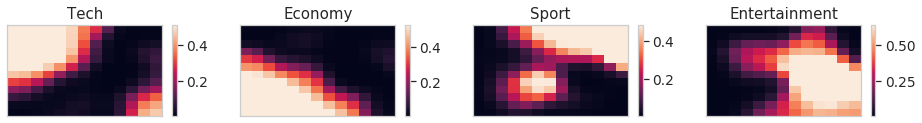

In [105]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

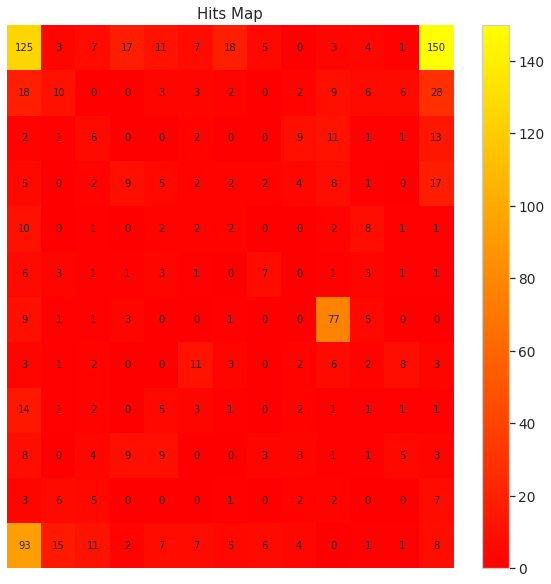

In [106]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)
plt.show()
#cmap="Greys"

/usr/local/lib/python3.6/dist-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


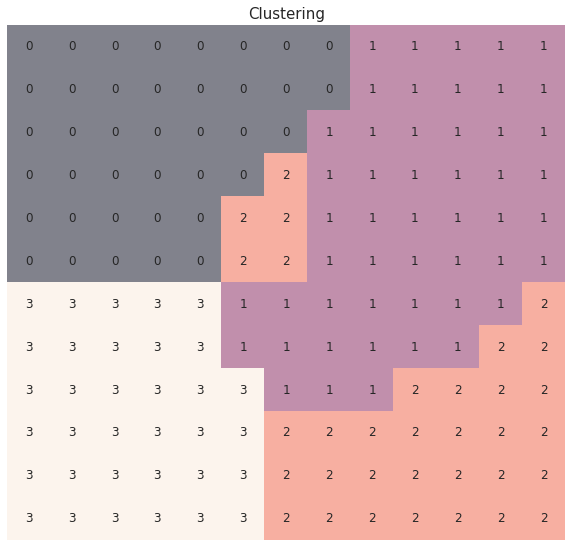

In [112]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)

In [116]:
!pip install somoclu

     |████████████████████████████████| 6.2MB 2.7MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=419208 sha256=58ddb4f26db124af8c08fe06ccb9703dc4f88303c13f39163d9b14bcb1319dc0
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline  

In [119]:
n_rows, n_columns = 4, 4
som = somoclu.Somoclu(n_columns, n_rows, data=lda_output)
%time som.train()

CPU times: user 14.2 ms, sys: 6 µs, total: 14.2 ms
Wall time: 7.35 ms


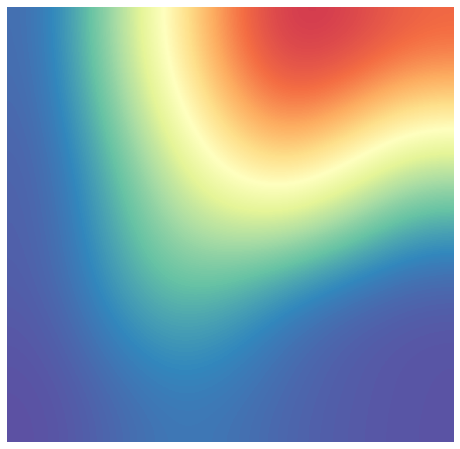

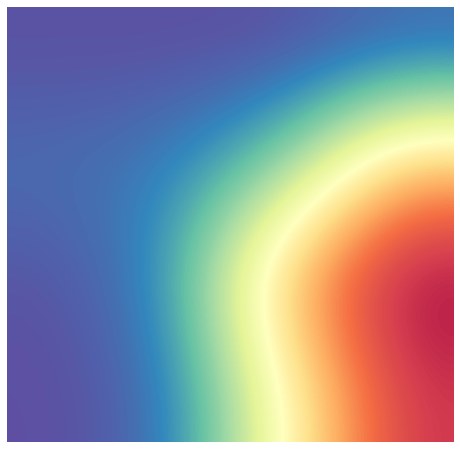

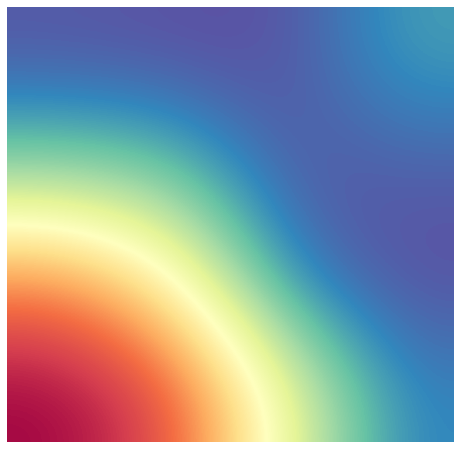

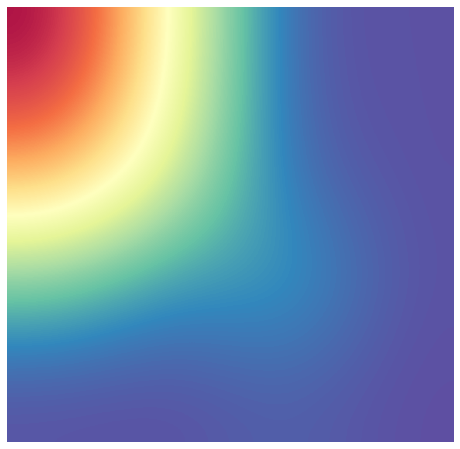

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [120]:
som.view_component_planes()

In [0]:
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)

IndexError: ignored

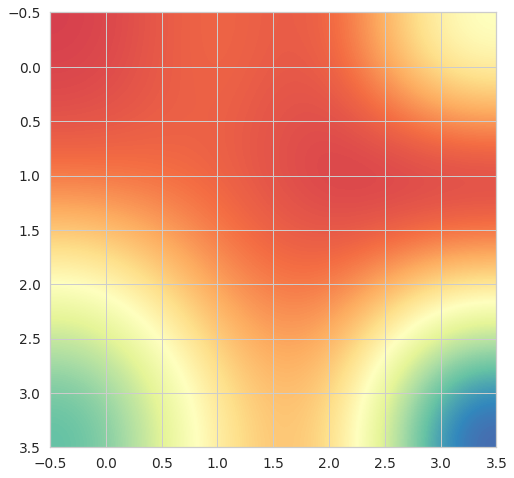

In [123]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

IndexError: ignored

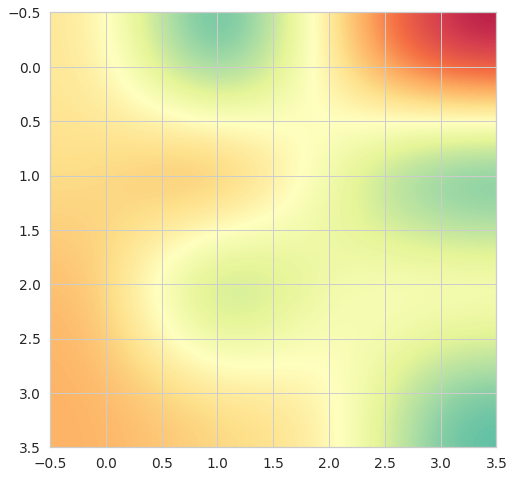

In [126]:
som = somoclu.Somoclu(4, 4, data=lda_output, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

IndexError: ignored

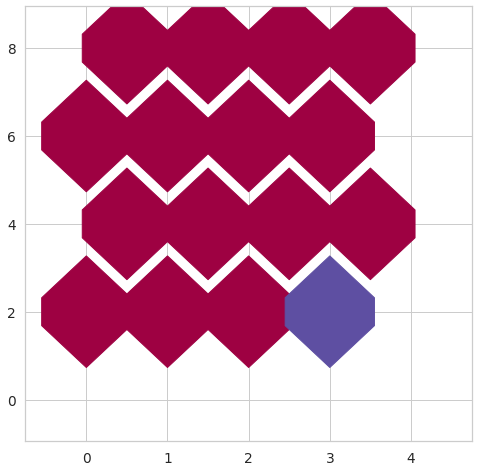

In [127]:
som = somoclu.Somoclu(4, 4, data=lda_output, gridtype="hexagonal")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

IndexError: ignored

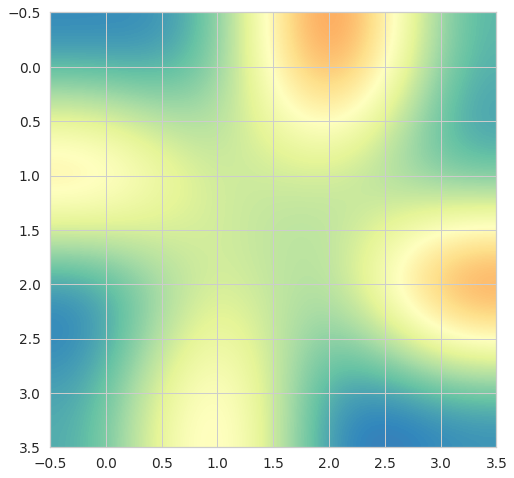

In [128]:
som = somoclu.Somoclu(4, 4, data=lda_output, maptype="toroid", initialization="pca")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

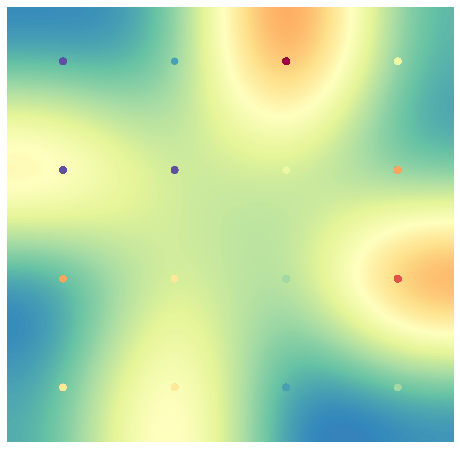

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [129]:
som.cluster()
som.view_umatrix(bestmatches=True)

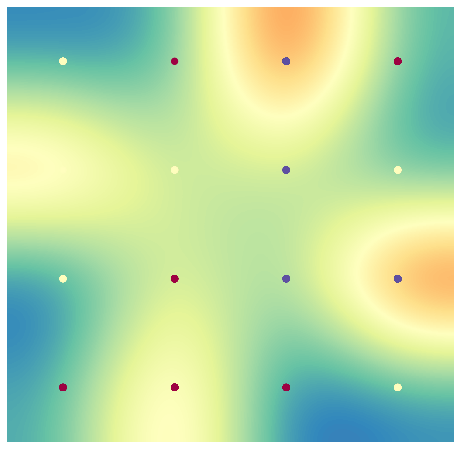

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [130]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

In [132]:
som = somoclu.Somoclu(4, 4, data=lda_output, maptype="toroid")
som.train()

In [133]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=2, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

NameError: ignored